In [34]:
import pandas as pd
import numpy as np

train = pd.read_csv('C:/Users/JH/Desktop/adjtrain.csv')
test = pd.read_csv('C:/Users/JH/Desktop/adjtest.csv')

features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','Fare']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

print(train.head())
print(test.head())

   PassengerId  Survived  Pclass     Sex   Age Embarked Title Family
0            1         0       3    male  22.0        S    Mr      M
1            2         1       1  female  38.0        C   Mrs      M
2            3         1       3  female  26.0        S  Miss      S
3            4         1       1  female  35.0        S   Mrs      M
4            5         0       3    male  35.0        S    Mr      S
   PassengerId  Pclass     Sex   Age Embarked Title Family
0          892       3    male  34.5        Q    Mr      S
1          893       3  female  47.0        S   Mrs      M
2          894       2    male  62.0        Q    Mr      S
3          895       3    male  27.0        S    Mr      S
4          896       3  female  22.0        S   Mrs      M


In [35]:
""" train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Family'] = dataset['Family'].astype(int) """

" train_test_data = [train, test]\n\nfor dataset in train_test_data:\n    dataset['Family'] = dataset['Family'].astype(int) "

In [36]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']


In [37]:
features_drop = ['Survived',"PassengerId"]
train_data = train.drop(features_drop, axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

print(train_data.shape, train_label.shape, test_data.shape)
train.head()

(891, 15) (891,) (418, 15)


,PassengerId,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Family_B,Family_M,Family_S
0,1,0,3,22.0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,2,1,1,38.0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,3,1,3,26.0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,4,1,1,35.0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,5,0,3,35.0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [38]:
train_data.head()

,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Family_B,Family_M,Family_S
0,3,22.0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,1,38.0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,3,26.0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,1,35.0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,3,35.0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [40]:
# Suffle
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [41]:
# Pipeline
def train_and_test(model):#, train_data, train_label, test_data):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\J

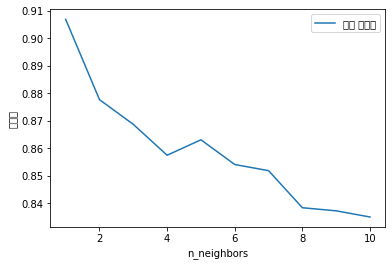

In [10]:
import matplotlib.pyplot as plt

nearest_neighbor = range(1,11)
training_accuracy = []
test_accuracy = []
for n in nearest_neighbor:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train_data, train_label)

    training_accuracy.append(clf.score(train_data, train_label))

plt.plot(nearest_neighbor, training_accuracy, label="훈련 정확도")

plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
    

In [45]:
from sklearn.model_selection import train_test_split
feature_drop = ['PassengerId']
train = train.drop(feature_drop, axis=1)
col_list = list(train.columns.values)

KeyError: "['PassengerId'] not found in axis"

In [48]:
data = train
target = train['Survived']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
stratify=target, test_size=0.25, random_state=33)

In [56]:
X_train.shape

(668, 16)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbor = range(1,17)

for i in n_neighbor:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.8654708520179372
0.8878923766816144
0.8878923766816144
0.8789237668161435
0.8699551569506726
0.8789237668161435
0.8699551569506726
0.874439461883408
0.8699551569506726
0.8789237668161435
0.8654708520179372
0.874439461883408
0.8789237668161435
0.8699551569506726
0.874439461883408
0.8834080717488789


0.8878923766816144
